#Principal Component Analysis


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

from sklearn.preprocessing import StandardScaler

In [ ]:
#Se toma la información del dataset 'iris' que inlcuye la librería seaborn
iris = sns.load_dataset('iris')

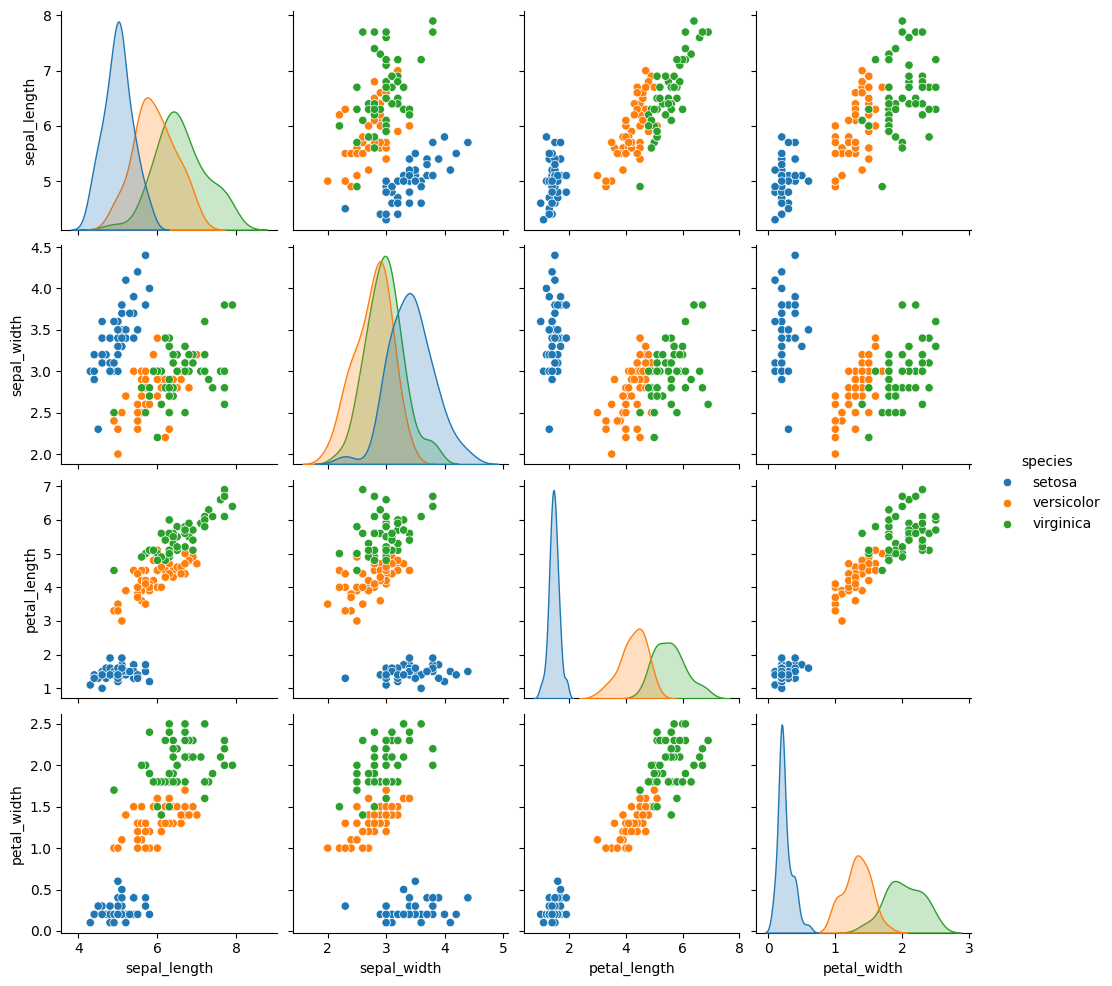

In [4]:
sns.pairplot(iris,  hue = 'species')

In [5]:
#Normalización z-score
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)
scaled.T  #Esto es la traspuesta de los datos normalizados escalados
#Se hace transpuesta del arreglo para poder operar la mtriz

array([[-9.00681170e-01, -1.14301691e+00, -1.38535265e+00,
        -1.50652052e+00, -1.02184904e+00, -5.37177559e-01,
        -1.50652052e+00, -1.02184904e+00, -1.74885626e+00,
        -1.14301691e+00, -5.37177559e-01, -1.26418478e+00,
        -1.26418478e+00, -1.87002413e+00, -5.25060772e-02,
        -1.73673948e-01, -5.37177559e-01, -9.00681170e-01,
        -1.73673948e-01, -9.00681170e-01, -5.37177559e-01,
        -9.00681170e-01, -1.50652052e+00, -9.00681170e-01,
        -1.26418478e+00, -1.02184904e+00, -1.02184904e+00,
        -7.79513300e-01, -7.79513300e-01, -1.38535265e+00,
        -1.26418478e+00, -5.37177559e-01, -7.79513300e-01,
        -4.16009689e-01, -1.14301691e+00, -1.02184904e+00,
        -4.16009689e-01, -1.14301691e+00, -1.74885626e+00,
        -9.00681170e-01, -1.02184904e+00, -1.62768839e+00,
        -1.74885626e+00, -1.02184904e+00, -9.00681170e-01,
        -1.26418478e+00, -9.00681170e-01, -1.50652052e+00,
        -6.58345429e-01, -1.02184904e+00,  1.40150837e+0

In [6]:
#matriz de covarianza, debería tener las dimensiones de las variables que tengo en
# el arregle, es decir, cuatro variables, una matris de covarianza de 4x4
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

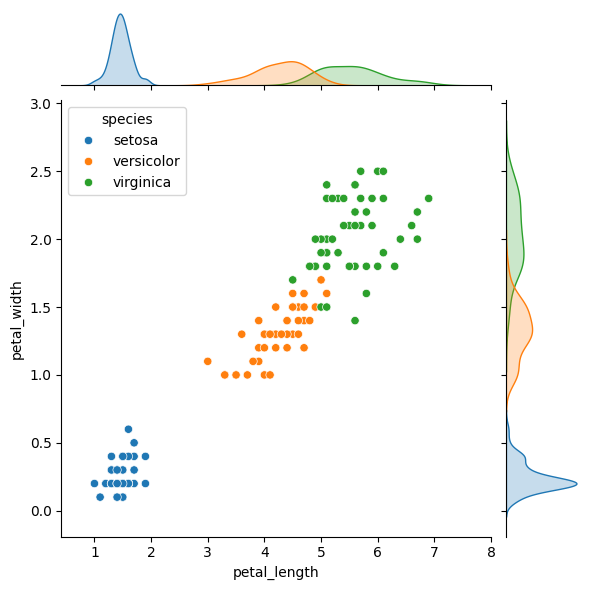

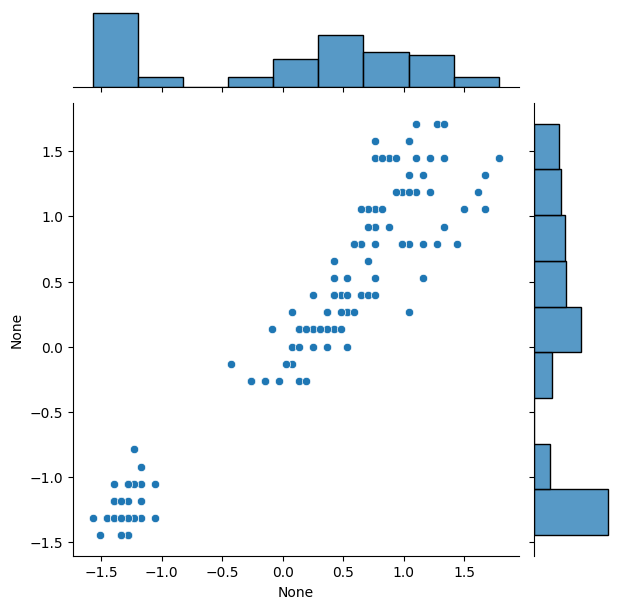

In [7]:
sns.jointplot(x= iris['petal_length'], y=iris['petal_width'], hue = iris['species'])
sns.jointplot(x = scaled[:, 2], y = scaled[:,3]) #Variable estandarizadas, se toman lo valores escalados

In [8]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [9]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [10]:
#Normalizar el valor de cada eigen value (valores propios) 
#respecto a la suma de todos los eigen values
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)



print(variance_explained)
 

[np.float64(72.96244541329987), np.float64(22.850761786701774), np.float64(3.668921889282877), np.float64(0.51787091071548)]


La primera componente por si sola ya captura el 72.96%, de la varianza total de las 4 dimensiones, y así sucesivamente podemos ver como cada una de las componentes captura un porcentaje de la varianza.

Esto ya nos esta diciendo que quizá la cuarta componente puede ser despreciable y tal vez, la tercera componente también puede ser despreciable



In [11]:
#Reducir las 4 variables según la información ya obtenida
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #Para reducir a 2 componentes mis datos
pca.fit(scaled) #se hace sobre los datos escalados

PCA(n_components=2)

In [12]:
pca.explained_variance_ratio_
#Escoge las dos primeras direcciones que son las que mas varianza capturan

array([0.72962445, 0.22850762])

In [13]:
#Se crea un nuevo conjunto de variables con las 2 primeras componentes
reduced_scaled = pca.transform(scaled)
#este método toma los datos originales y me entrega la tranformación resultante de la descomposición de valores y vectores propios

#Se muestra que la reducción ya ha sido realizada
print(scaled.shape)
print(reduced_scaled.shape)

(150, 4)
(150, 2)


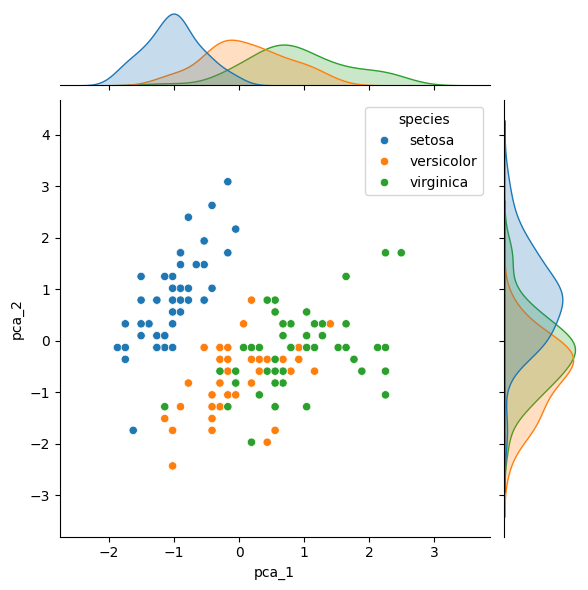

In [14]:
#Gráfico de dispersión de las dimensiones reducidas, con pérdida de información pero mínima
iris['pca_1'] = scaled[:,0]
iris['pca_2'] = scaled[:,1]
sns.jointplot(x = iris['pca_1'], y = iris['pca_2'], hue = iris['species'])